In [5]:
from diffusers import DDPMPipeline

In [8]:
ddpm = DDPMPipeline.from_pretrained('google/ddpm-celebahq-256')

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/archbaer/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/archbaer/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

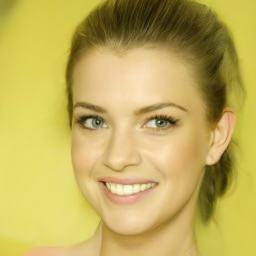

In [22]:
ddpm(num_inference_steps=50).images[0]

In [11]:
from diffusers import DDPMScheduler, UNet2DModel

In [16]:
scheduler = DDPMScheduler.from_pretrained('google/ddpm-celebahq-256')
model = UNet2DModel.from_pretrained('google/ddpm-celebahq-256')

An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [17]:
scheduler.set_timesteps(50)

In [18]:
import torch

sample_size = model.config.sample_size

In [21]:
sample_size

256

In [23]:
noise = torch.randn((1, 3, sample_size, sample_size))

In [24]:
for t in scheduler.timesteps:
    with torch.no_grad():
        noise_residual = model(noise, t).sample
    
    previous_noise_sample = scheduler.step(noise_residual, t, noise).prev_sample

    noise = previous_noise_sample

In [25]:
from PIL import Image